<center><img src="tinder-app.avif" width="1194" height="619"></center>

Tinder est une application de rencontres en ligne et de réseautage géosocial. Dans Tinder, les utilisateurs « glissent vers la droite » pour aimer ou « glissent vers la gauche » pour ne pas aimer les profils des autres utilisateurs, qui incluent leurs photos, une courte biographie et une liste de leurs intérêts.  

En 2021, Tinder a enregistré plus de 65 milliards de matchs dans le monde.
***

# <center><font color="tomato"><ins>**PROJET**</ins></font></center>  

L’équipe marketing a besoin d’aide sur un nouveau projet.  
> ***Ils constatent une diminution du nombre de correspondances et ils essaient de trouver un moyen de comprendre ce qui fait que les gens s’intéressent les uns aux autres***.  

Ils ont décidé de mener une expérience de speed dating avec des personnes qui devaient donner à Tinder beaucoup d’informations sur elles-mêmes qui pourraient finalement se refléter sur leur profil de rencontre sur l’application.  

Tinder a ensuite recueilli les données de cette expérience. Chaque ligne de l’ensemble de données représente un rendez-vous rapide entre deux personnes et indique si chacune d’entre elles a secrètement accepté d’aller à un deuxième rendez-vous avec l’autre personne.  
***

<center><img src="Illustration.png" width="1194" height="619"></center>

#### <font color="VIOLET"><ins>Import</font>

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## <center><font color="tomato"><ins>**1 - ETUDE DES DONNEES FOURNIES**</ins></font></center>  

#### <font color="VIOLET"><ins>Récupération des données dans un dataframe</font>

In [4]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding="cp1252")

###### Note : Windows-1252 ou CP1252 (abréviation de « code page – 1252 » , signifiant Page de code – 1252) est un jeu de caractères, utilisé historiquement par défaut sur le système d'exploitation Microsoft Windows en anglais et dans les principales langues d’Europe de l’Ouest, dont le français.

In [5]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["match"].sort_values(ascending=False).head(10)

match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.305853
like      0.305723
fun_o     0.277700
fun       0.277545
shar_o    0.270840
shar      0.270679
attr_o    0.260837
Name: match, dtype: float64

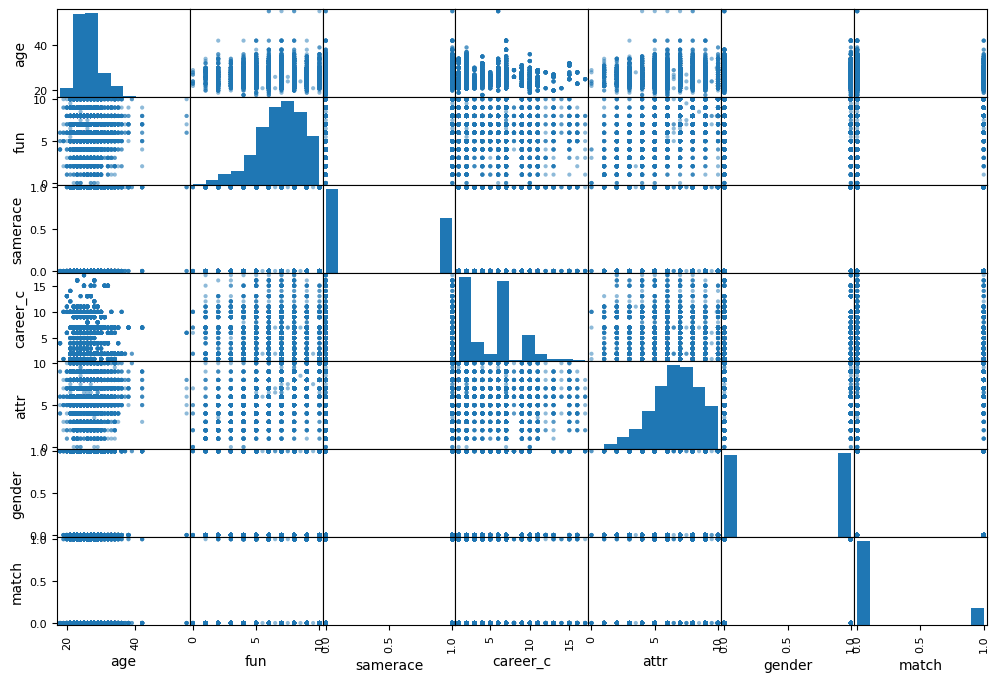

In [6]:
from pandas.plotting import scatter_matrix
derived_df = df[['age', 'fun', 'samerace', 'career_c', 'attr', 'gender', 'match' ]]
df = derived_df.dropna()
features_list = ['age', 'fun', 'samerace', 'career_c', 'attr', 'gender', 'match' ]
scatter_matrix(df[features_list], figsize=(12, 8))
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, f1_score, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression

In [8]:
X = df.loc[:,features_list]
y = df.loc[:,"match"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = X_test.reset_index().drop(columns=["index"])
X_test_age = X_test[X_test["attr"]==8]
X_test_age.index.tolist()

numeric_features = ['age', 'fun', 'samerace', 'attr', 'gender' ] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = ['career_c']
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop='first')

    # Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
transformers=[
            ('cat', categorical_transformer, categorical_features),    
            ('num', numeric_transformer, numeric_features)
            ]
        )

X_train = feature_encoder.fit_transform(X_train)
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
X_test2 = feature_encoder.transform(X_test)
y_test_pred = regressor.predict(X_test2)
mse = mean_squared_error(y_test, y_test_pred)

print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test2, y_test))
print("MSE est de :", mse)
print("F1 score", f1_score(y_train, y_train_pred))

R2 score on training set :  0.8276081424936387
R2 score on test set :  0.8282442748091603
MSE est de : 0.1717557251908397
F1 score 0.1070840197693575


In [9]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5139,   78],
       [1006,   65]], dtype=int64)

In [10]:
print(f"Classes dans y_test: {np.unique(y_train)}")
print(f"Classes dans y_pred: {np.unique(y_train_pred)}")

Classes dans y_test: [0 1]
Classes dans y_pred: [0 1]


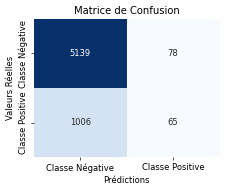

In [11]:
plt.figure(figsize=(4, 3), dpi=60)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe Négative', 'Classe Positive'],
            yticklabels=['Classe Négative', 'Classe Positive'])

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
 # Définir la grille de paramètres
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'solver' : ['liblinear', 'saga']}
# Initialiser le modèle de recherche de grille 
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
# Ajuster le modèle de recherche de grille
grid_search.fit(X_train, y_train) # Imprimer les meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

c:\Users\NewNoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NewNoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NewNoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NewNoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NewNoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

Meilleurs paramètres : {'C': 0.01, 'solver': 'saga'}


c:\Users\NewNoe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
import joblib
joblib.dump(regressor, "rf_model.sav")

['rf_model.sav']

In [14]:
def predict(data1, data2):
    regressor = joblib.load("rf_model.sav")
    return regressor.score(data1, data2)

In [15]:
print("R2 score on training set : ", predict(X_train, y_train))

R2 score on training set :  0.8276081424936387


In [16]:
sgd_clf = SGDClassifier(random_state=42)
y_score_train = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
y_score_test = cross_val_predict(sgd_clf, X_test, y_test, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score_train)

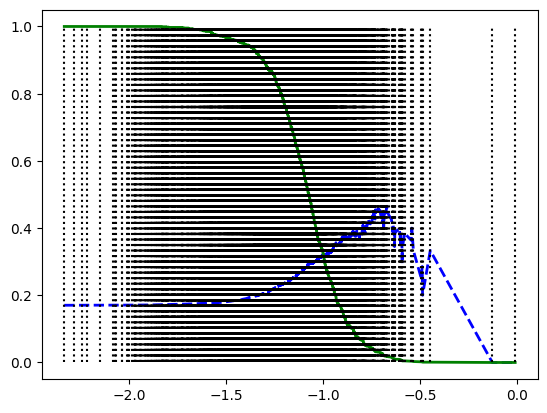

In [17]:
plt.plot(thresholds, precisions[:-1], "b--", label="presicion", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="rappel", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="seuil")
plt.show()

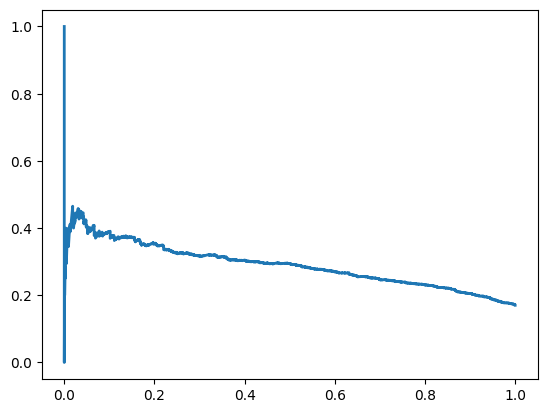

In [18]:
plt.plot(recalls, precisions, linewidth=2, label="Courbe de precision")
plt.show()

In [19]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

IndexError: index 5177 is out of bounds for axis 0 with size 5177

In [ ]:
fpr, tpr, thresholds_train = roc_curve(y_train, y_train_pred)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="Courbe ROC")
plt.plot([0, 1], [0, 1], 'k:', label="Courbe ROC du classificateur aléatoire")
plt.plot([fpr_90], [tpr_90], "ko", label="Seuil pour precision à 90%")
plt.show()


NameError: name 'threshold_for_90_precision' is not defined

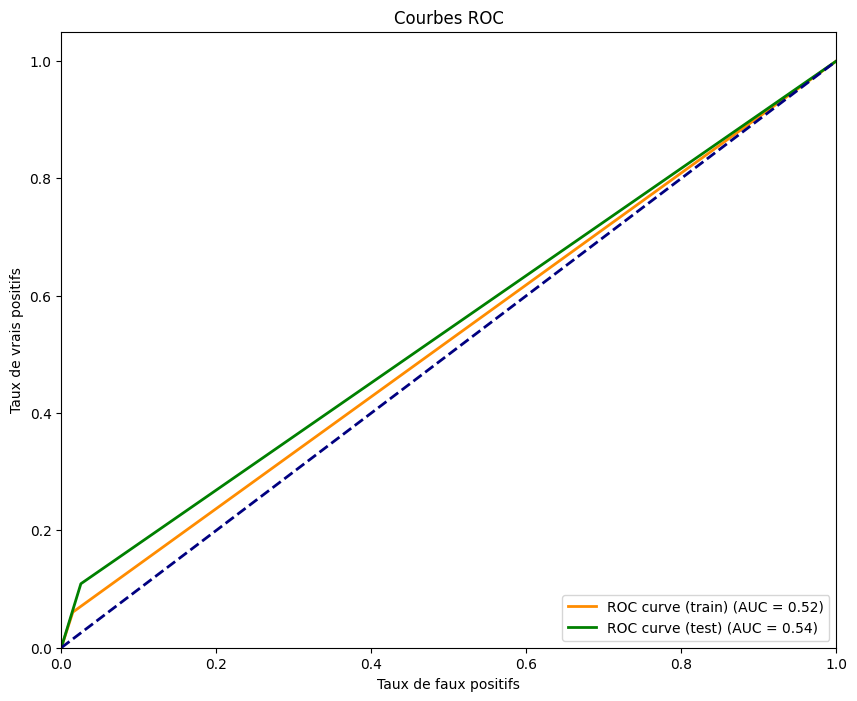

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color="darkorange", lw=2, label="ROC curve (train) (AUC = %0.2f)" % roc_auc_train)
plt.plot(fpr_test, tpr_test, color="green", lw=2, label="ROC curve (test) (AUC = %0.2f)" % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.metrics import classification_report
y_pred = regressor.predict(X_test2) > 0.5
report = classification_report(y_test, y_pred)
print(report)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score

In [9]:

import seaborn as sn
confusion_matrix_test = confusion_matrix(y_test, y_pred)
print(confusion_matrix_test)

NameError: name 'y_pred' is not defined

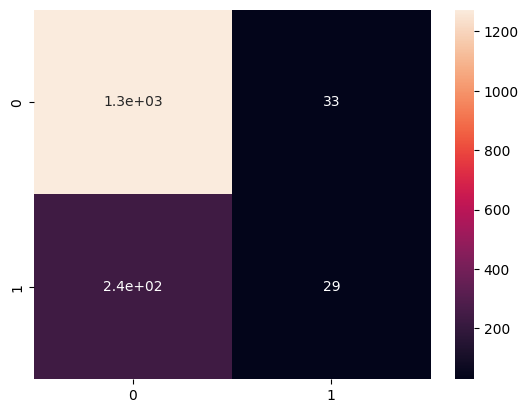

In [ ]:
sn.heatmap(confusion_matrix_test, annot=True)
plt.show()

In [ ]:
y_pred = regressor.predict(X_train) > 0.5
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.90      5217
           1       0.45      0.06      0.11      1071

    accuracy                           0.83      6288
   macro avg       0.65      0.52      0.51      6288
weighted avg       0.77      0.83      0.77      6288



In [ ]:

confusion_matrix_train = confusion_matrix(y_train, y_pred)
print(confusion_matrix_train)

[[5139   78]
 [1006   65]]


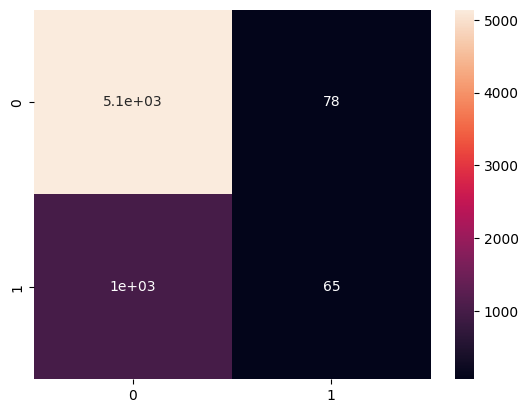

In [ ]:
sn.heatmap(confusion_matrix_train, annot=True)
plt.show()

In [ ]:
train_accurancy = accuracy_score(y_train, y_train_pred)
print(train_accurancy)
test_accurancy = accuracy_score(y_test, y_test_pred)
print(test_accurancy)

NameError: name 'accuracy_score' is not defined

In [ ]:
train_auc = roc_auc_score(y_train, y_train_pred)
print(train_auc)
test_auc = roc_auc_score(y_test, y_test_pred)
print(test_auc)

0.5228699108548921
0.5418772812582758


In [ ]:
train_recall = recall_score(y_train, y_train_pred)
print(train_recall)
test_recall = recall_score(y_test, y_test_pred)
print(test_recall)


0.06069094304388422
0.10902255639097744


In [ ]:
performance_table = pd.DataFrame({
        'Métrique': ['Accuracy', 'AUC', 'Recall'],
        'Ensemble d\'entrainement': [train_accurancy, train_auc, train_recall],
        'Ensemble de test': [test_accurancy, test_auc, test_recall]
})
print(performance_table)

   Métrique  Ensemble d'entrainement  Ensemble de test
0  Accuracy                 0.827608          0.828244
1       AUC                 0.522870          0.541877
2    Recall                 0.060691          0.109023


In [38]:
from sklearn.model_selection import GridSearchCV
 # Définir la grille de paramètres
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'solver' : ['liblinear', 'saga']}
# Initialiser le modèle de recherche de grille 
grid_search = GridSearchCV(regressor, param_grid, cv=5) 
# Ajuster le modèle de recherche de grille
grid_search.fit(X_train, y_train) # Imprimer les meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\utils\validation.py", line 971, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\utils\validation.py", line 631, in _ensure_sparse_format
    _assert_all_finite(
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "d:\Projet_Tinder\.venv\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [35]:
# Définition des seuils de classification pour lesquels on va calculer
# les scores d'accuracy
threshold_array = np.linspace(0, 1, 100)
accuracy_list = []

for threshold in threshold_array:
    # Labels prédits pour un seuil donné
    label_pred_threshold = (50 > threshold).astype(int)
    # Calcul de l'accuracy pour un seuil donné
    accuracy_threshold = accuracy_score(
        y_true=y_test, y_pred=label_pred_threshold
    )

    accuracy_list.append(accuracy_threshold)

plt.plot(threshold_array, accuracy_list)
plt.show()

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got np.int64(1) instead.

In [ ]:
    # Connection sur AWS avec transfert du fichier csv via Fivetran sur une base de données Postgrés.

# connection = "postgresql://jedhadatabase.clwqcisew0ya.eu-west-3.rds.amazonaws.com/postgres?user=postgres&password=Evrard77260"
# dataset = pd.read_sql("SELECT * FROM google_sheet.tinder", con=connection)

In [ ]:
# connection sur Azure avec création d'un pipeline sur azure pour transfére sur une base Sql.

# def demander_nombre():
#     while True:
#         entree = input("Veuillez entrer un nombre : ")
#         try:
#             nombre = int(entree)
#             print(f"Merci ! Vous avez entré le nombre : {nombre}")
#             return nombre
#         except ValueError:
#             print("Entrée invalide. Veuillez entrer un nombre valide.")

# if __name__ == "__main__":
#     load_dotenv(find_dotenv("./.env"))
#     # Informations de connexion
#     server = 'lelimon77260.database.windows.net'
#     database = 'Speed_Dating_Data'
#     username = os.environ.get("access_username")
#     password = os.environ.get("access_password")
#     driver = 'ODBC Driver 17 for SQL Server'

#     # Créez un moteur de connexion
#     connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'
#     engine = create_engine(connection_string)
#     age_debut = demander_nombre()
#     age_fin = demander_nombre()
#     try:
#         # Écrivez votre requête SQL\n",
#         # query = \"SELECT * from essai.[table]\"  \n",
#         query_age = "EXEC select_age2 @age_debut="+str(age_debut)+", @age_fin="+str(age_fin)+";"
#         # Exécutez la requête et stockez le résultat dans un DataFrame\n",
#         df = pd.read_sql(query_age, engine)
#     except Exception as e:
#         print(f"Erreur de connexion : {e}")
#         df = pd.read_csv("Speed_Dating_Data.csv", encoding="cp1252")
#     finally:
#         # Fermez le moteur de connexion...
#         engine.dispose()
#         print("la connection est terminée")

In [ ]:
# import requests

# data = {'message':'fichier ok', 'numero':'0676874940'}
  
# # sending post request and saving response as response object
# r = requests.get(url = 'https://noe.infos.st/Make/index.php', params = data)
# pastebin_url = r.text
# print("The pastebin URL is :%s"%pastebin_url)

The pastebin URL is :gammu-smsd-inject[7823]: Warning: No PIN code in /etc/gammu-smsdrc file
gammu-smsd-inject[7823]: Created outbox message OUTC20240605_091427_00_0676874940_sms0.smsbackup
Written message with ID /var/spool/gammu/outbox/OUTC20240605_091427_00_0676874940_sms0.smsbackup



In [ ]:
df6 = df.groupby(['age', 'gender'])['match'].sum().reset_index()    
rdv = df6[df6.gender == 0].sum()
result = rdv.match
result

np.float64(680.0)

In [ ]:
exemple1 = df.groupby([(df.wave == 6)])['pf_o_att'].max().reset_index()
exemple1 = exemple1[exemple1.wave == True]
exemple1

,wave,pf_o_att
1,True,20.83


In [ ]:
preference_positive = df[(df.dec == 1)]
preference_positive = preference_positive.fillna(df.mean(numeric_only=True))
research_good = preference_positive.groupby(['gender', (preference_positive.age == 37)]).agg({'attr':'mean','sinc':'mean','intel':'mean','fun':'mean','amb':'mean','shar':'mean'}).reset_index()
research_good = research_good[research_good.age == True] 
research_good

,gender,age,attr,sinc,intel,fun,amb,shar
2,1,True,7.25,8.043791,8.592149,7.25,7.25,5.474559


In [ ]:
list_search_good_male = research_good[research_good['gender'] == 1].reset_index()    
list_search_good_male = list_search_good_male.drop('gender', axis=1)
list_search_good_male = list_search_good_male.drop('age', axis=1)            
list_search_good_male = list_search_good_male.drop('index', axis=1) 
list_search_good_male

,attr,sinc,intel,fun,amb,shar
0,7.25,8.333333,9.0,7.25,7.25,NaN


In [ ]:
df.shape

(8378, 195)

In [ ]:
def Races(x):
    if x == 1.0:
        size = "Black/African American"
    elif x == 2.0:
        size = "European/Caucasian-American"
    elif x == 3.0:
        size = "Latino/Hispanic American"
    elif x == 4.0:
        size = "Asian/Pacific Islander/Asian-American"
    elif x == 5.0:
        size = "Native American"
    else:
        size = "Other"
    return size

###### Note : Nous avons 195 colonnes sur 8 378 lignes

In [ ]:
list_race = df['race'].value_counts().reset_index()
list_race.race = list_race.race.map(Races)
list_race.race

0              European/Caucasian-American
1    Asian/Pacific Islander/Asian-American
2                 Latino/Hispanic American
3                                    Other
4                   Black/African American
Name: race, dtype: object

In [ ]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\Noé\AppData\Local\Temp\ipykernel_26660\1277559549.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [ ]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

In [ ]:
df['iid'].max()

552

###### Note : sachant que nous avons une ligne par rendez-vous, nous avons donc 552 personnes qui ont participé à cette expérience.

In [ ]:
df.sample(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
413,34,14.0,0,27,2,2,16,2,NaN,16,6,45.0,0,-0.05,0,28.0,2.0,25.00,15.00,25.00,15.00,0.00,20.00,1,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,21.0,Applied Maths/Econs,8.0,NaN,NaN,NaN,4.0,2.0,2.0,SIngapore,"807,931",NaN,1.0,6.0,2.0,Banking,7.0,7.0,6.0,6.0,7.0,4.0,4.0,5.0,4.0,7.0,7.0,6.0,9.0,10.0,7.0,7.0,7.0,7.0,6.0,5.0,30.00,5.00,30.00,15.00,15.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,25.00,20.00,5.00,10.00,7.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,5.0,6.0,5.0,6.0,5.0,5.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,30.00,0.00,30.00,20.00,20.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,4.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7415,509,1.0,0,1,2,21,22,21,21.0,19,6,536.0,0,0.84,0,29.0,2.0,30.00,20.00,20.00,20.00,10.00,0.00,0,6.0,7.0,6.0,4.0,8.0,3.0,6.0,4.0,2.0,28.0,journalism,6.0,NYU,"1,340.00","25,380.00",4.0,2.0,2.0,working,"10,594",NaN,2.0,4.0,2.0,journalism,16.0,6.0,3.0,6.0,7.0,7.0,7.0,3.0,3.0,4.0,6.0,4.0,4.0,8.0,5.0,7.0,7.0,7.0,6.0,NaN,10.00,20.00,30.00,10.00,10.00,20.00,50.0,10.0,10.0,10.0,10.0,10.0,50.00,10.00,10.00,10.00,10.00,10.00,5.0,6.0,4.0,8.0,9.0,5.0,6.0,8.0,3.0,9.0,1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,30.0,20.0,10.0,20.0,5.0,5.0,10.00,20.00,10.00,20.00,10.00,30.00,50.0,10.0,10.0,20.0,5.0,5.0,70.00,5.00,5.00,10.00,5.00,5.00,3.0,3.0,7.0,2.0,7.0,3.0,3.0,8.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4922,330,9.0,0,17,1,13,9,7,7.0,8,7,338.0,0,-0.35,0,27.0,6.0,10.00,20.00,25.00,20.00,20.00,5.00,1,7.0,7.0,8.0,7.0,9.0,6.0,7.0,5.0,2.0,22.0,MA in Quantitative Methods,5.0,Cal Berkeley,"1,309.00","15,162.00",4.0,3.0,3.0,California (West Coast),NaN,NaN,1.0,7.0,3.0,not sure yet :),10.0,8.0,7.0,7.0,8.0,5.0,5.0,2.0,2.0,9.0,5.0,7.0,2.0,8.0,4.0,9.0,5.0,2.0,7.0,NaN,15.00,25.00,15.00,20.00,10.00,15.00,25.0,10.0,10.0,25.0,10.0,20.0,50.00,10.00,5.00,15.00,5.00,15.00,8.0,10.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,0,4.0,9.0,8.0,6.0,8.0,2.0,5.0,9.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,15.00,20.00,10.00,15.00,40.0,5.0,10.0,25.0,5.0,15.0,50.00,5.00,10.00,20.00,5.00,10.00,8.0,10.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

###### Note : nom des colonnes peu explicite

In [ ]:
len(df.iid)
len(df[df.fun5_3.isna()])

6362

In [ ]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

###### Note : beaucoup de données manquantes

##### Appréciation : Le nom des colonnes n'étant pas trés explicite, la documentation fournie nous sera d'une grande aide. Le nombre de 552 participants à cette étude n'est pas trés élevé au vue des 65 milliards de match dans le monde. Beaucoup de données sont manquantes et donc demanderont une attention particuliére. Une ligne correspond à un rendez-vous. Les évaluations demandées ne sont pas notées dans la même base en fonction de la wave ce qui posera un probléme lors de calculs. Nous avons peu de données catégorielles.
***

## <center><font color="tomato"><ins>**2 - ETUDE DU PROFIL DES UTILISATEURS**</ins></font></center> 

#### <font color="VIOLET"><ins>Profil physique</font>

##### <font color="#3FFF33">Répartition hommes / femmes</font>

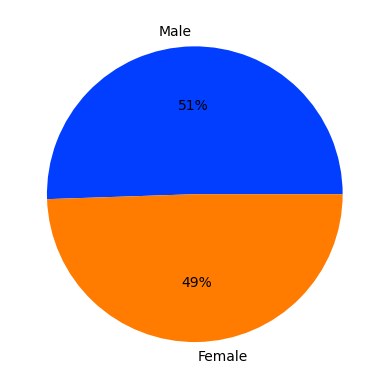

In [27]:
gender = df.gender.value_counts()
gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(gender, labels=gender.index, colors=colors, autopct="%0.0f%%")
plt.show()

###### Note : Bonne répartition pour des matchs hétérosexuels

##### <font color="#3FFF33">Origines des participants</font>

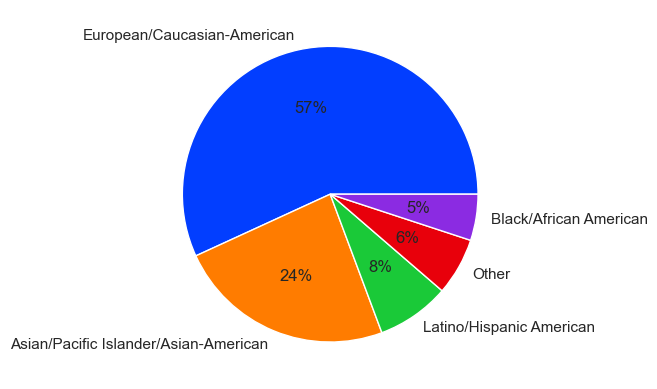

In [ ]:
race = df.race.value_counts()
def Races(x):
    if x == 1.0:
        size = "Black/African American"
    elif x == 2.0:
        size = "European/Caucasian-American"
    elif x == 3.0:
        size = "Latino/Hispanic American"
    elif x == 4.0:
        size = "Asian/Pacific Islander/Asian-American"
    elif x == 5.0:
        size = "Native American"
    else:
        size = "Other"
    return size
race.index = race.index.map(Races)
colors = sns.color_palette("bright")
plt.pie(race, labels=race.index, colors=colors, autopct="%0.0f%%")
plt.show()

##### <font color="#3FFF33">Age des participants</font>

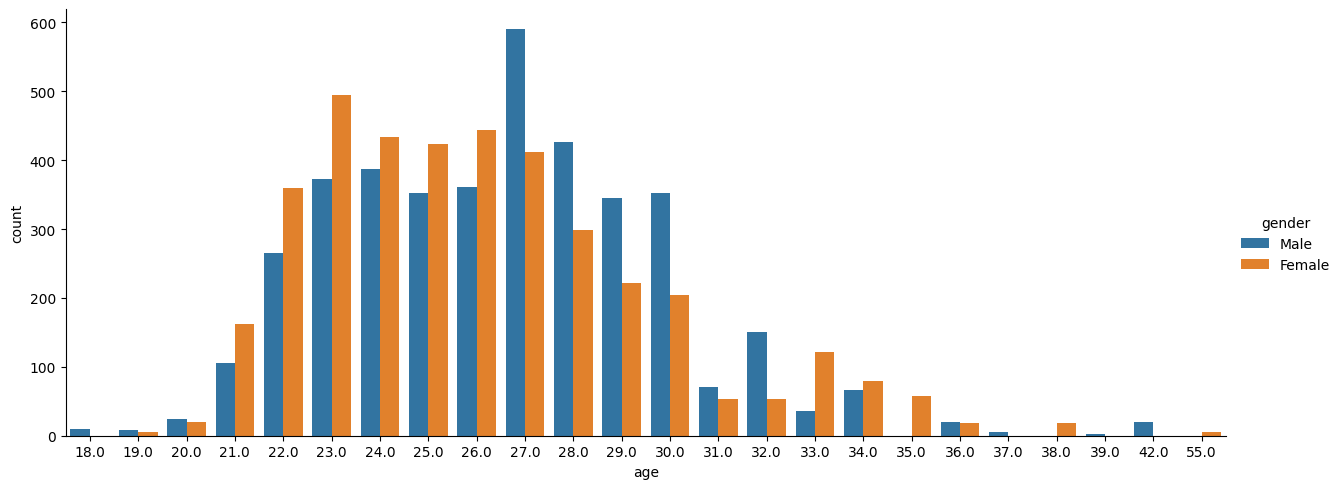

In [21]:
age_gender = df.groupby('age')['gender'].value_counts().reset_index()
age_gender['gender'] = age_gender['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
sns.catplot(x="age", y="count", kind="bar", hue="gender", data=age_gender, aspect=2.5)

#### Appréciation : Ce sont les femmes qui utilisent le plus l'appplication, certainement par sécurité par rapport à une relation fortuite. Cela s'étompe vers la trentaine, age moyen du premier enfant pour les pays en développement.   
***

#### <font color="VIOLET"><ins>Profil social</font>

##### <font color="#3FFF33">Domaine d'étude scolaire</font>

In [26]:
count = df.field_cd.value_counts().sort_values(ascending=False)
count

AttributeError: 'DataFrame' object has no attribute 'field_cd'

###### Note : nous avons beaucoup de domaine peu representatif que nous allons regrouper dans une catégorie other afin de ne pas encombrer notre graph.

In [1]:
other = count[count<count.quantile(.50)].sum()
count['others'] = other
other

NameError: name 'count' is not defined

In [ ]:
count = count[count>=count.quantile(.25)]
count

field_cd
8.0       1925
10.0       993
5.0        864
13.0       709
3.0        696
1.0        665
9.0        626
11.0       468
6.0        325
7.0        241
2.0        207
15.0       187
4.0        143
others     247
Name: count, dtype: int64

In [ ]:
def student(x):
    if x == 1.0:
        size = "Law"
    elif x == 2.0:
        size = "Math"
    elif x == 3.0:
        size = "Social Science, Psychologist"
    elif x == 4.0:
        size = "Medical Science, Pharmaceuticals, and Bio Tech"
    elif x == 5.0:
        size = "Engineering"
    elif x == 6.0:
        size = "English/Creative Writing/ Journalism"
    elif x == 7.0:
        size = "History/Religion/Philosophy"
    elif x == 8.0:
        size = "Business/Econ/Finance"
    elif x == 9.0:
        size = "Education, Academia"
    elif x == 10.0:
        size = "Biological Sciences/Chemistry/Physics"
    elif x == 11.0:
        size = "Social Work"
    elif x == 12.0:
        size = "Undergrad/undecided"
    elif x == 13.0:
        size = "Political Science/International Affairs"
    elif x == 14.0:
        size = "Film"
    elif x == 15.0:
        size = "Fine Arts/Arts Administration"
    elif x == 16.0:
        size = "Languages"
    elif x == 17.0:
        size = "Architecture"
    else:
        size = "Other"
    return size

count.index = count.index.map(student)
colors = sns.color_palette("bright")
labels = count.index
count

field_cd
Business/Econ/Finance                             1925
Biological Sciences/Chemistry/Physics              993
Engineering                                        864
Political Science/International Affairs            709
Social Science, Psychologist                       696
Law                                                665
Education, Academia                                626
Social Work                                        468
English/Creative Writing/ Journalism               325
History/Religion/Philosophy                        241
Math                                               207
Fine Arts/Arts Administration                      187
Medical Science, Pharmaceuticals, and Bio Tech     143
Other                                              247
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x219661b4aa0>,
 [Text(0.82044424717186, 0.7327149768379243, 'Business/Econ/Finance'),
  Text(-0.2861760233795207, 1.062122066262953, 'Biological Sciences/Chemistry/Physics'),
  Text(-0.9051366176675938, 0.6250821572859592, 'Engineering'),
  Text(-1.0999582769927376, 0.009580651082681035, 'Political Science/International Affairs'),
  Text(-0.952766747857938, -0.5497595148573677, 'Social Science, Psychologist'),
  Text(-0.5580369142575058, -0.9479424045404664, 'Law'),
  Text(-0.04747264871546357, -1.0989751351254213, 'Education, Academia'),
  Text(0.3989191125344813, -1.0251163551786215, 'Social Work'),
  Text(0.6843023834387175, -0.8612376257573112, 'English/Creative Writing/ Journalism'),
  Text(0.8518290046125145, -0.695979415572654, 'History/Religion/Philosophy'),
  Text(0.9571085425850141, -0.5421653232278789, 'Math'),
  Text(1.0270678038238605, -0.3938676508021853, 'Fine Arts/Arts Administration'),
  Text(1.068150931541904, -0.262780492895045, 'Medic

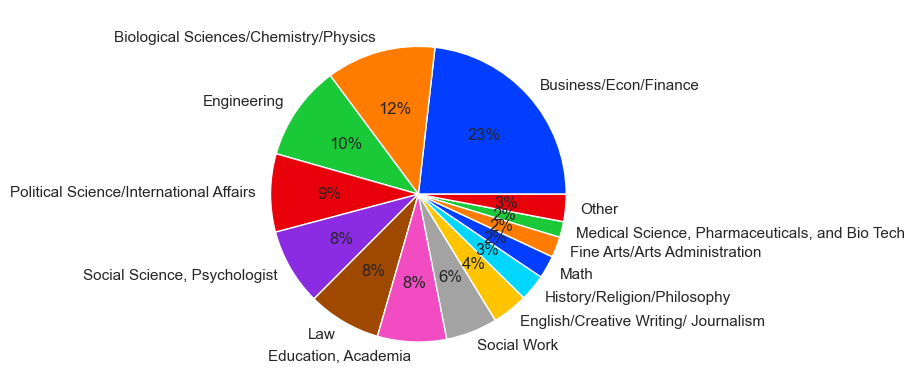

In [ ]:
plt.pie(count, labels=labels, colors=colors, autopct="%0.0f%%")


##### <font color="#3FFF33">Domaine de l'emploi</font>

In [ ]:
carriere = df.career_c.value_counts()
other2 = carriere[carriere<carriere.quantile(.50)].sum()
carriere['others'] = other2
carriere = carriere[carriere>=carriere.quantile(.50)]

def ProfilSociaux(x):
    if x == 1.0:
        size = "Lawyer"
    elif x == 2.0:
        size = "Academic/Research"
    elif x == 3.0:
        size = "Psychologist"
    elif x == 4.0:
        size = "Doctor/Medicine"
    elif x == 5.0:
        size = "Engineer"
    elif x == 6.0:
        size = "Creative Arts/Entertainment"
    elif x == 7.0:
        size = "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin"
    elif x == 8.0:
        size = "Real Estate"
    elif x == 9.0:
        size = "International/Humanitarian Affairs"
    elif x == 10.0:
        size = "Undecided"
    elif x == 11.0:
        size = "Social Work"
    elif x == 12.0:
        size = "Speech Pathology"
    elif x == 13.0:
        size = "Politics"
    elif x == 14.0:
        size = "Pro sports/Athletics"
    elif x == 15.0:
        size = "Other"
    elif x == 16.0:
        size = "Journalism"
    elif x == 17.0:
        size = "Architecture"
    else:
        size = "Other"
    return size

carriere.index = carriere.index.map(ProfilSociaux)
colors = sns.color_palette("bright")
labels = carriere.index
carriere

career_c
Academic/Research                                                       2320
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin    2170
Creative Arts/Entertainment                                              724
Lawyer                                                                   675
International/Humanitarian Affairs                                       547
Doctor/Medicine                                                          421
Undecided                                                                379
Psychologist                                                             261
Other                                                                    509
Name: count, dtype: int64

#### Le domaine de leur emploi est dans Academic/Research et Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin

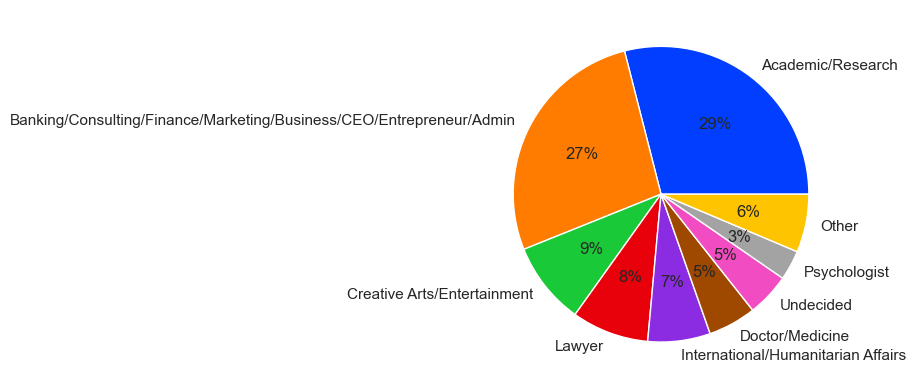

In [ ]:
plt.pie(carriere, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

##### <font color="#3FFF33">Activités</font>

gaming      32210.0
yoga        36011.0
tvsports    37972.0
tv          44019.0
shopping    46734.0
hiking      47612.0
clubbing    47686.0
exercise    51834.0
sports      53323.0
art         55724.0
theater     56235.0
concerts    56644.0
museums     57975.0
reading     63724.0
dining      64598.0
music       65156.0
movies      65725.0
dtype: float64


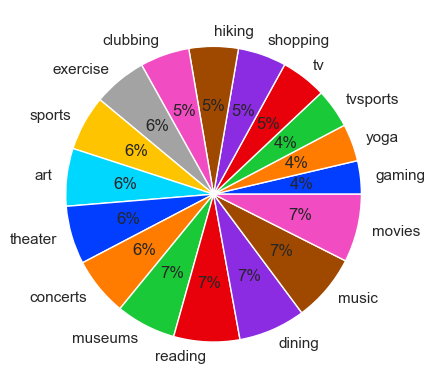

In [ ]:
list_activites = df.loc[:, 'sports' : 'yoga']
list_activites = list_activites.sum().sort_values()
print(list_activites)
colors = sns.color_palette("bright")
labels = list_activites.index
plt.pie(list_activites, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

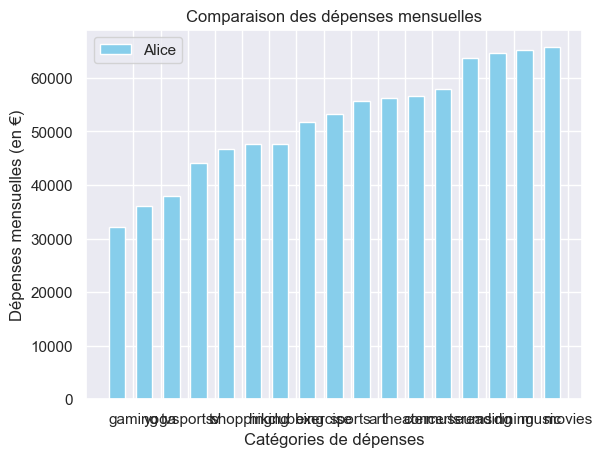

In [ ]:
categories = list_activites.index
# Dépenses mensuelles pour Alice, Bob et Carole
alice_expenses = list_activites.to_list()
# Créer un tableau pour les positions de l'axe x
x = np.arange(len(categories))
# Largeur des barres, nous en avons besoin car nous avons l'intention de tracer plusieurs barres.
bar_width = 0.6
# Créer des barres pour les dépenses d'Alice, soustraire la largeur des barres du tableau x,
# de telle sorte qu'elle soit placé à gauche.
plt.bar(x - bar_width, alice_expenses, width=bar_width, label='Alice', color='skyblue')
# Ajouter des étiquettes, un titre et une légende
plt.xlabel('Catégories de dépenses')
plt.ylabel('Dépenses mensuelles (en €)')
plt.title('Comparaison des dépenses mensuelles')
# Pour afficher les noms des catégories sur les positions de l'axe des x.
plt.xticks(x, categories)
plt.legend()
# Afficher le graphe
plt.show()

#### Les 5 principales activitées sont le cinéma, la musique, sortie au restaurant, la lecture et la visite des musées

## <center><font color="tomato"><ins>**2 - ETUDE DES ATTENTES DES PARTICIPANTS**</ins></font></center>

#### <font color="VIOLET"><ins>Habitude de vie</font>

##### <font color="#3FFF33">Fréquence des rendez-vous</font>

In [ ]:
rdv = df.date.value_counts()

def Frequence(x):
    if x == 1.0:
        size = "Several times a week"
    elif x == 2.0:
        size = "Twice a week"
    elif x == 3.0:
        size = "Once a week"
    elif x == 4.0:
        size = "Twice a mont"
    elif x == 5.0:
        size = "Once a month"
    elif x == 6.0:
        size = "Several times a year"
    else:
        size = "Almost never"
    return size

rdv.index = rdv.index.map(Frequence)
colors = sns.color_palette("bright")
labels = rdv.index
rdv['Almost never']

1434

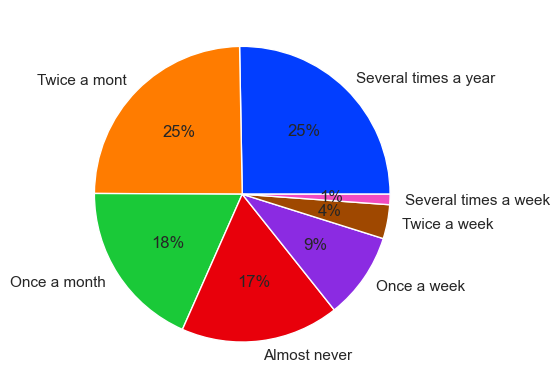

In [ ]:
colors = sns.color_palette("bright")
labels = rdv.index
plt.pie(rdv, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

###### Note : On voit clairement que la fréquence des rendez-vous sur le court terme n'est pas trés éleve.

##### <font color="#3FFF33">Fréquence de leurs sorties diverses</font>

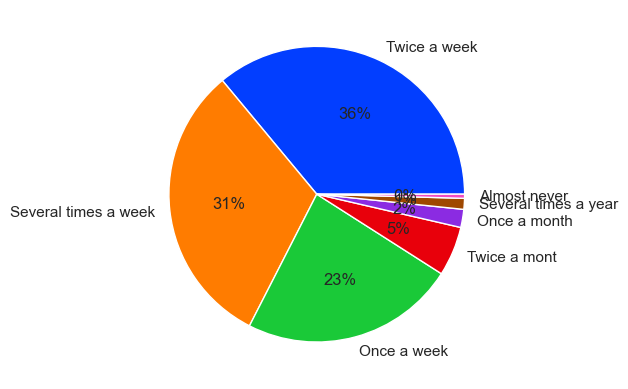

In [ ]:
go_out = df.go_out.value_counts()

go_out.index = go_out.index.map(Frequence)
colors = sns.color_palette("bright")
labels = go_out.index
colors = sns.color_palette("bright")
labels = go_out.index
plt.pie(go_out, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

###### Note : Nos participants sont des gens qui sortent souvent

In [ ]:
dffff = pd.merge(df.go_out.value_counts(), df.date.value_counts(), right_index=True, left_index=True).reset_index()
dffff

,index,count_x,count_y
0,2.0,2990,308
1,1.0,2610,94
2,3.0,1949,783
3,4.0,450,2040
4,5.0,164,1528
5,6.0,99,2094
6,7.0,37,1434


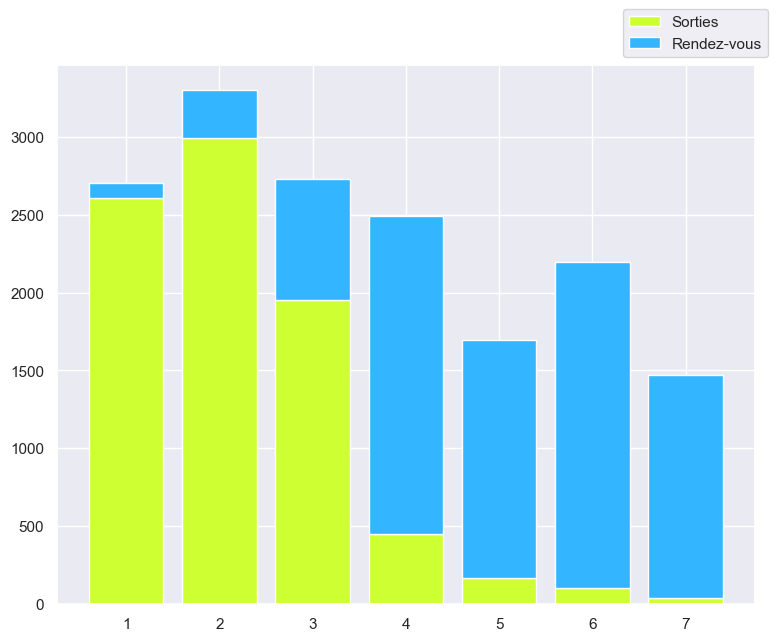

In [ ]:
plt.figure(figsize=(9, 7))
plt.bar(dffff['index'], dffff['count_x'], color="#CEFF33", label="Sorties")
plt.bar(dffff['index'], dffff["count_y"], color="#33B5FF", bottom=np.array(dffff['count_x']), label="Rendez-vous")

plt.legend(loc="lower left", bbox_to_anchor=(0.8, 1.0))
plt.show()

###### Note : On se rencontre que malgré les sorties le nombre de rencontres est bien en deça du nombre de rendez-vous

c:\Users\Noé\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\Noé\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\Noé\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\Noé\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


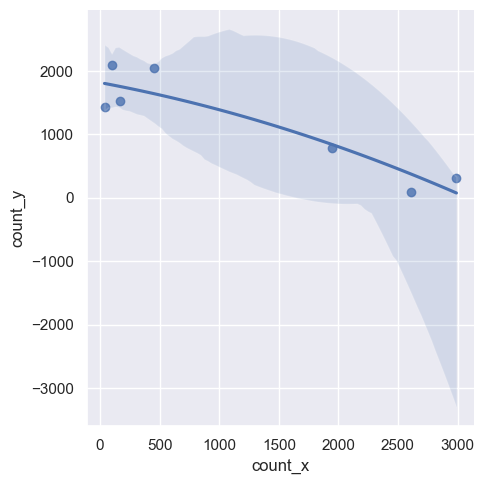

In [ ]:
sns.lmplot(x='count_x', y='count_y' , data=dffff , order=2)

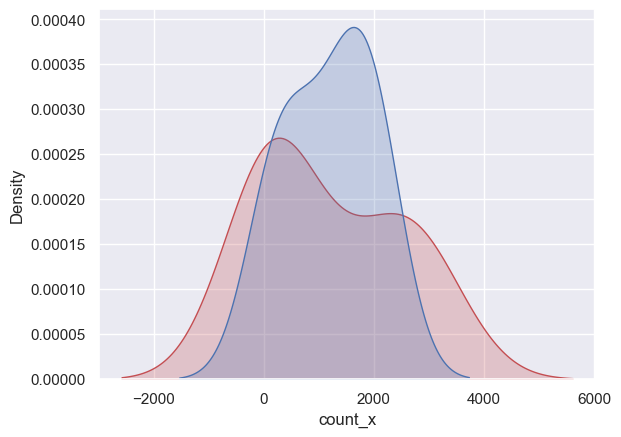

In [ ]:
sns.set_theme(style="darkgrid")
sns.kdeplot(dffff['count_x'], fill=True, color="r")
sns.kdeplot(dffff['count_y'], fill=True, color="b")
plt.show()

# Nous allons maintenant déterminer ce que recherche les gens dans le sexe opposé

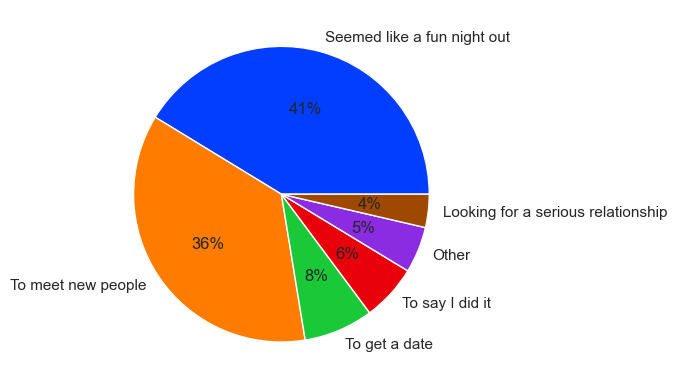

In [ ]:
objectifs = df.goal.value_counts()

def Objects(x):
    if x == 1.0:
        size = "Seemed like a fun night out"
    elif x == 2.0:
        size = "To meet new people"
    elif x == 3.0:
        size = "To get a date"
    elif x == 4.0:
        size = "Looking for a serious relationship"
    elif x == 5.0:
        size = "To say I did it"
    else:
        size = "Other"
    return size

objectifs.index = objectifs.index.map(Objects)
colors = sns.color_palette("bright")
labels = objectifs.index
objectifs
colors = sns.color_palette("bright")
labels = objectifs.index
plt.pie(objectifs, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

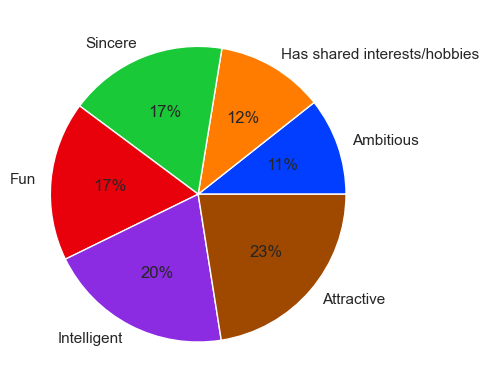

In [ ]:
list_search = df.loc[:, 'attr1_1' : 'shar1_1'].sum().sort_values()
def quality(x):
    if x == 'attr1_1':
        size = "Attractive"
    elif x == 'sinc1_1':
        size = "Sincere"
    elif x == 'intel1_1':
        size = "Intelligent"
    elif x == 'fun1_1':
        size = "Fun"
    elif x == 'amb1_1':
        size = "Ambitious"
    else:
        size = "Has shared interests/hobbies"
    return size
list_search.index = list_search.index.map(quality)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(list_search, labels=list_search.index, colors=colors, autopct="%0.0f%%")
plt.show()

### La principale qualité recherchée est l'attractivité et suivie de l'intelligence

In [ ]:
ethnic = df['imprace'].value_counts().reset_index(name='somme')
ethnic['iid'] = ethnic['imprace']
ethnic

,imprace,somme,iid
0,1.0,2798,1.0
1,3.0,983,3.0
2,2.0,954,2.0
3,8.0,663,8.0
4,5.0,657,5.0
5,7.0,543,7.0
6,6.0,524,6.0
7,4.0,510,4.0
8,9.0,409,9.0
9,10.0,250,10.0


In [ ]:
religious = df['imprelig'].value_counts().reset_index(name='total')
religious['iid'] = religious['imprelig']
religious

,imprelig,total,iid
0,1.0,3032,1.0
1,3.0,929,3.0
2,2.0,863,2.0
3,5.0,697,5.0
4,6.0,661,6.0
5,4.0,524,4.0
6,8.0,517,8.0
7,7.0,467,7.0
8,10.0,327,10.0
9,9.0,282,9.0


In [ ]:
dataset = religious.merge(ethnic, on='iid')
dataset = dataset.sort_values('iid')

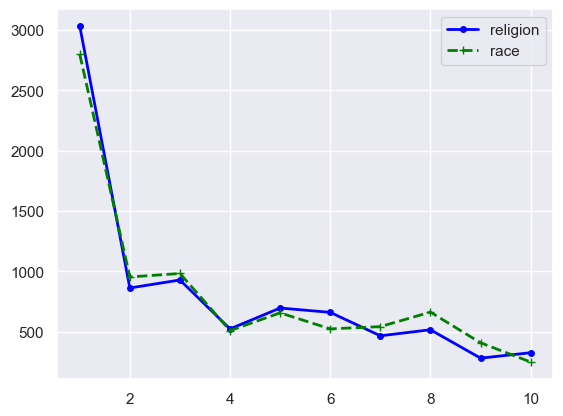

In [ ]:
plt.plot(
    'iid', 'total', data=dataset,
    marker='o', # marker type
    markerfacecolor='blue', # color of marker
    markersize=4, # size of marker
    color='blue', # color of line
    linewidth=2, # change width of line
    label="religion" # label for legend
)

plt.plot(
    'iid', 'somme', data=dataset,
    marker='+', # no marker
    color='green', # color of line
    linewidth=2, # change width of line
    linestyle='dashed', # change type of line
    label="race" # label for legend
)

# show legend
plt.legend()

# show graph
plt.show()

### Les caractéres ethniques, que sont la religion et la race, sont trés prononcés

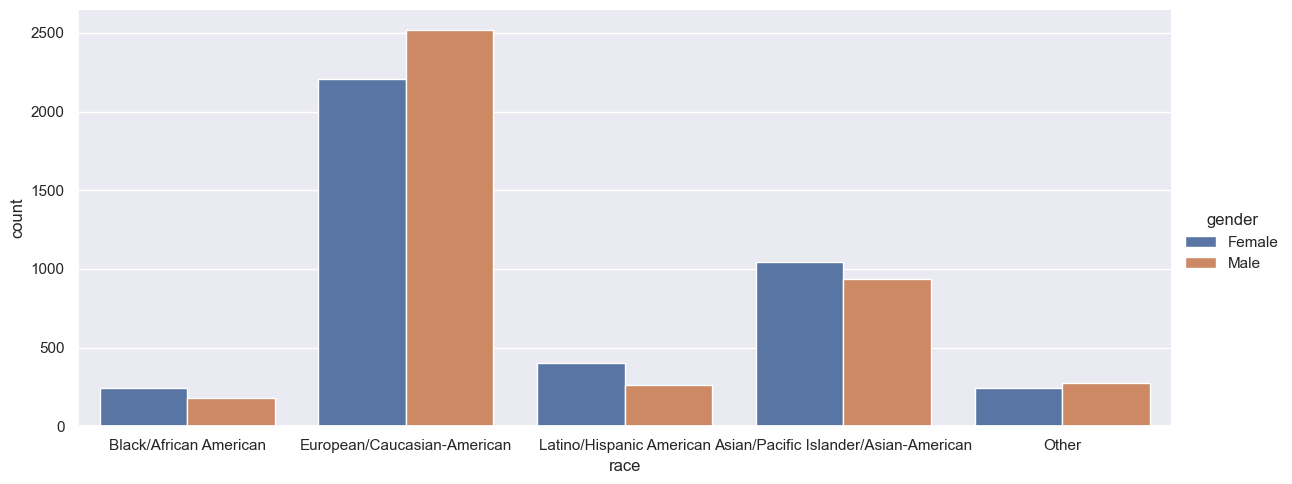

In [ ]:
race_gender = df.groupby('race')['gender'].value_counts().reset_index()
race_gender['race'] = race_gender['race'].apply(Races)
race_gender['gender'] = race_gender['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
sns.catplot(x="race", y="count", kind="bar", hue="gender", data=race_gender, aspect=2.4)

In [ ]:
male0 = df[(df.gender == 1) & (df.match == 0) & (df.dec_o == 0)]
malepf = male0.loc[:, 'pf_o_att' : 'pf_o_sha'].sum().sort_values()

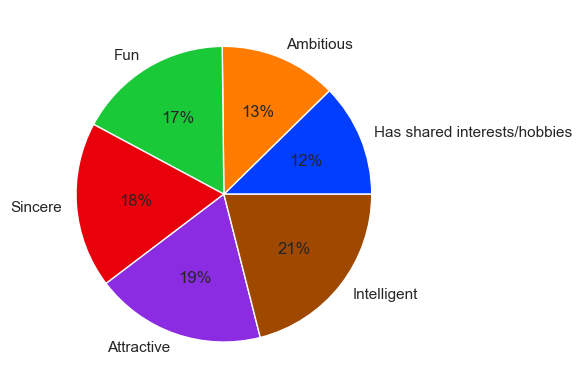

In [ ]:
def quality_pf_o(x):
    if x == 'pf_o_att':
        size = "Attractive"
    elif x == 'pf_o_sin':
        size = "Sincere"
    elif x == 'pf_o_int':
        size = "Intelligent"
    elif x == 'pf_o_fun':
        size = "Fun"
    elif x == 'pf_o_amb':
        size = "Ambitious"
    else:
        size = "Has shared interests/hobbies"
    return size
malepf.index = malepf.index.map(quality_pf_o)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(malepf, labels=malepf.index, colors=colors, autopct="%0.0f%%")
plt.show()

### Les préférences déclarées au premier rendez-vous envers les hommes

In [ ]:
female0 = df[(df.gender == 0) & (df.match == 0) & (df.dec_o == 0)]
femalepf = female0.loc[:, 'pf_o_att' : 'pf_o_sha'].sum().sort_values()

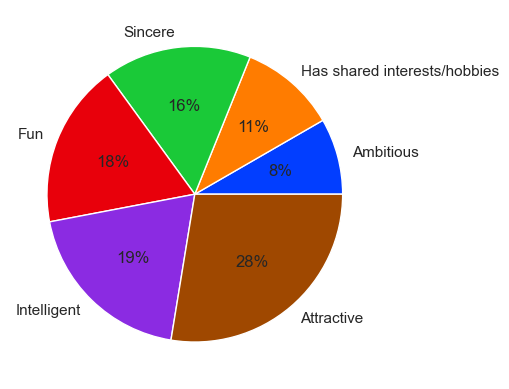

In [ ]:
femalepf.index = femalepf.index.map(quality_pf_o)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(femalepf, labels=femalepf.index, colors=colors, autopct="%0.0f%%")
plt.show()

### Les préférences déclarées au premier rendez-vous envers les femmes

In [ ]:
male_evaluation0 = male0.loc[:, 'attr_o' : 'shar_o'].sum().sort_values()
male_evaluation0

shar_o     10561.0
attr_o     13382.5
fun_o      13989.5
amb_o      16131.0
sinc_o     17181.0
intel_o    18079.5
dtype: float64

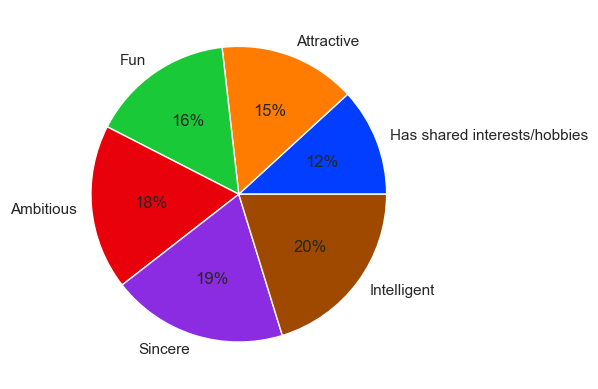

In [ ]:
def quality_o(x):
    if x == 'attr_o':
        size = "Attractive"
    elif x == 'sinc_o':
        size = "Sincere"
    elif x == 'intel_o':
        size = "Intelligent"
    elif x == 'fun_o':
        size = "Fun"
    elif x == 'amb_o':
        size = "Ambitious"
    else:
        size = "Has shared interests/hobbies"
    return size
male_evaluation0.index = male_evaluation0.index.map(quality_o)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(male_evaluation0, labels=male_evaluation0.index, colors=colors, autopct="%0.0f%%")
plt.show()

### On voit clairement que suite au premier rendez-vous, l'attractivité lui n'y était pas !!!

In [ ]:
female_evaluation0 = female0.loc[:, 'attr_o' : 'shar_o'].sum().sort_values()
female_evaluation0

shar_o      8964.0
attr_o     11639.5
fun_o      12061.0
amb_o      12368.0
sinc_o     14463.0
intel_o    14484.0
dtype: float64

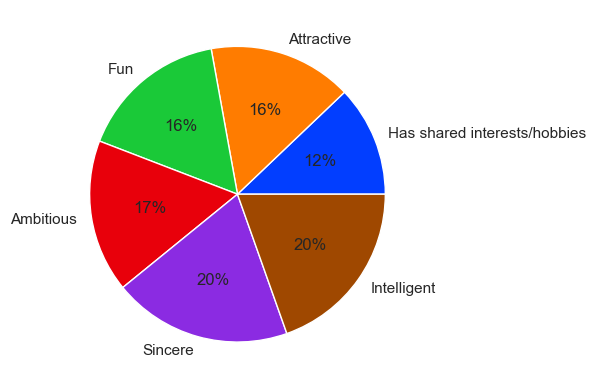

In [ ]:
def quality_o(x):
    if x == 'attr_o':
        size = "Attractive"
    elif x == 'sinc_o':
        size = "Sincere"
    elif x == 'intel_o':
        size = "Intelligent"
    elif x == 'fun_o':
        size = "Fun"
    elif x == 'amb_o':
        size = "Ambitious"
    else:
        size = "Has shared interests/hobbies"
    return size
female_evaluation0.index = female_evaluation0.index.map(quality_o)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(female_evaluation0, labels=female_evaluation0.index, colors=colors, autopct="%0.0f%%")
plt.show()

### Même chose pour les femmes

In [ ]:
female1 = df[(df.gender == 0) & (df.match == 1) & (df.dec_o == 1)]
female_evaluation1 = female1.loc[:, 'attr_o' : 'shar_o'].sum().sort_values()

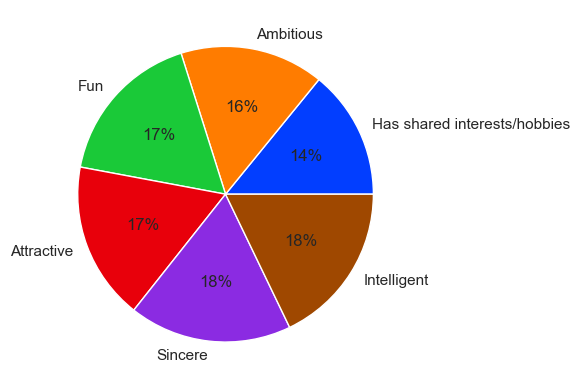

In [ ]:
female_evaluation1.index = female_evaluation1.index.map(quality_o)
colors = sns.color_palette("bright")
plt.pie(female_evaluation1, labels=female_evaluation1.index, colors=colors, autopct="%0.0f%%")
plt.show()

In [ ]:
male1 = df[(df.gender == 1) & (df.match == 1) & (df.dec_o == 1)]
male_evaluation1 = male1.loc[:, 'attr_o' : 'shar_o'].sum().sort_values()
male_evaluation1

shar_o     4277.0
amb_o      4828.0
attr_o     4898.0
fun_o      5221.0
sinc_o     5365.0
intel_o    5539.5
dtype: float64

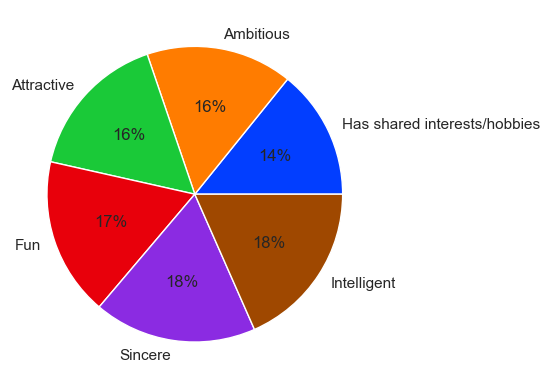

In [ ]:
male_evaluation1.index = male_evaluation1.index.map(quality_o)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(male_evaluation1, labels=male_evaluation1.index, colors=colors, autopct="%0.0f%%")
plt.show()

### Que ce soit pour les femmes ou les hommes, on voit clairement que tous les paramétres ont matché pour la prise d'un deuxiéme rendez-vous

### Attente des gens dans les rencontres recherchées

In [ ]:
df['exphappy'].value_counts()

exphappy
5.0     2033
6.0     2003
7.0     1475
4.0      793
3.0      706
8.0      513
2.0      297
9.0      216
10.0     125
1.0      116
Name: count, dtype: int64

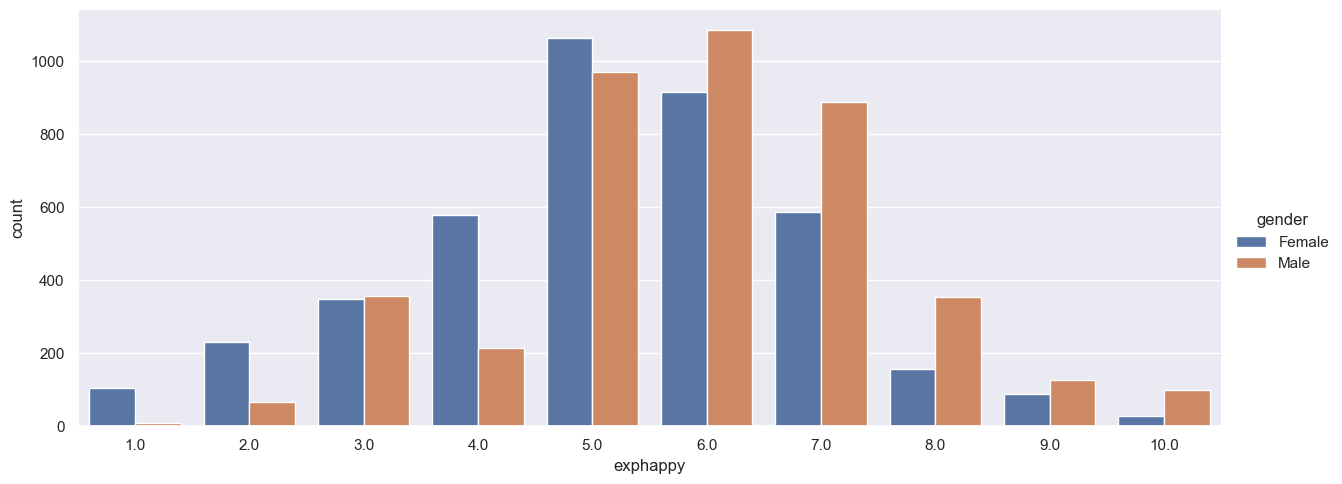

In [ ]:

happy_gender = df.groupby('exphappy')['gender'].value_counts().reset_index()
happy_gender['gender'] = happy_gender['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
sns.catplot(x="exphappy", y="count", kind="bar", hue="gender", data=happy_gender, aspect=2.5)

#### L'application n'arrive pas vraiment à convaincre les gens que le bonheur est assuré dans les matches proposés

In [ ]:
wave1a5_10a21 = df[(df['wave'] <= 5) | (df['wave'] >=10)]
wave1a5_10a21 = wave1a5_10a21.fillna(0)
research = wave1a5_10a21.groupby('wave')['fun1_1'].mean().reset_index(name='fun1_1')
amb1_1 = wave1a5_10a21.groupby('wave')['amb1_1'].mean()
research.insert(loc=len(research.columns), column='amb1_1', value=amb1_1)
shar1_1 = wave1a5_10a21.groupby('wave')['shar1_1'].mean()
research.insert(loc=len(research.columns), column='shar1_1', value=shar1_1)
sinc1_1 = wave1a5_10a21.groupby('wave')['sinc1_1'].mean()
research.insert(loc=len(research.columns), column='sinc1_1', value=sinc1_1)
intel1_1 = wave1a5_10a21.groupby('wave')['intel1_1'].mean()
research.insert(loc=len(research.columns), column='intel1_1', value=intel1_1)
attr1_1 = wave1a5_10a21.groupby('wave')['attr1_1'].mean()
research.insert(loc=len(research.columns), column='attr1_1', value=attr1_1)
research

,wave,fun1_1,amb1_1,shar1_1,sinc1_1,intel1_1,attr1_1
0,1,19.614500,NaN,NaN,NaN,NaN,NaN
1,2,16.271382,7.414500,9.665500,11.114500,19.869000,32.321000
2,3,16.850000,8.812500,8.927632,17.710526,22.671053,23.600329
3,4,16.611111,10.500000,10.900000,14.100000,19.300000,20.300000
4,5,18.157895,10.416667,12.861111,18.000000,22.083333,19.750000
5,10,16.166667,9.736842,7.368421,15.526316,18.421053,30.789474
6,11,16.754048,NaN,NaN,NaN,NaN,NaN
7,12,15.447143,NaN,NaN,NaN,NaN,NaN
8,13,15.144444,NaN,NaN,NaN,NaN,NaN
9,14,17.126111,NaN,NaN,NaN,NaN,NaN


In [ ]:
research.isnull().sum()

wave        0
fun1_1      0
amb1_1      5
shar1_1     5
sinc1_1     5
intel1_1    5
attr1_1     5
dtype: int64

In [ ]:

wave6a9 = df[(df['wave'] >5) & (df['wave'] <10)]
wave6a9 = wave6a9.fillna(0)
research2 = wave6a9.groupby('wave')['fun1_1'].mean().reset_index(name='fun1_1')
amb1_1 = wave6a9.groupby('wave')['amb1_1'].mean()
research2.insert(loc=len(research2.columns), column='amb1_1', value=amb1_1)
shar1_1 = wave6a9.groupby('wave')['shar1_1'].mean()
research2.insert(loc=len(research2.columns), column='shar1_1', value=shar1_1)
sinc1_1 = wave6a9.groupby('wave')['sinc1_1'].mean()
research2.insert(loc=len(research2.columns), column='sinc1_1', value=sinc1_1)
intel1_1 = wave6a9.groupby('wave')['intel1_1'].mean()
research2.insert(loc=len(research2.columns), column='intel1_1', value=intel1_1)
attr1_1 = wave6a9.groupby('wave')['attr1_1'].mean()
research2.insert(loc=len(research2.columns), column='attr1_1', value=attr1_1)
research2

C:\Users\Noé\AppData\Local\Temp\ipykernel_26660\3220780543.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wave6a9 = wave6a9.fillna(0)


,wave,fun1_1,amb1_1,shar1_1,sinc1_1,intel1_1,attr1_1
0,6,15.860000,NaN,NaN,NaN,NaN,NaN
1,7,18.443125,NaN,NaN,NaN,NaN,NaN
2,8,17.416500,NaN,NaN,NaN,NaN,NaN
3,9,17.709000,NaN,NaN,NaN,NaN,NaN
